<div >
<img src = "figures_notebook/banner.png" />
</div>

# Clasificando digitos con Redes Neuronales usando Keras 

Uno de los conjuntos de datos ampliamente utilizados para la clasificación de imágenes es el conjunto de datos MNIST (LeCun et al., 1998) de dígitos escritos a mano. En el momento de su lanzamiento en la década de 1990, planteó un desafío formidable para la mayoría de los algoritmos de aprendizaje automático, que constaba de 60.000 imágenes de  resolución28x28  de píxeles (más un conjunto de datos de prueba de 10,000 imágenes).

 Lograr una alta precisión en el reconocimiento de dígitos fue un componente clave en la automatización de la clasificación de cartas para el servicio postal de EEUU.

Durante más de una década, MNIST sirvió como punto de referencia para comparar algoritmos de aprendizaje automático.

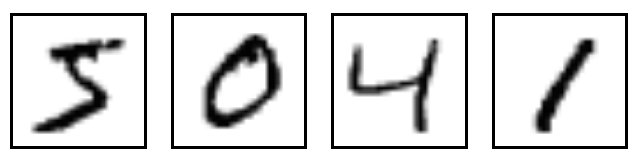


## Llamando las librerías

In [ ]:
# install.packages("pacman") #run this line if you use Google Colab

In [1]:
require('pacman')
p_load("tidyverse","keras",'caret')

Loading required package: pacman



### ¿Qué es Keras?

Keras es una biblioteca de aprendizaje profundo de código abierto escrita en Python. Keras proporciona una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo en una variedad de plataformas.La biblioteca Keras es conocida por ser fácil de usar, modular y extensible. Permite a los usuarios crear modelos de aprendizaje profundo con pocas líneas de código y está diseñada para ser utilizada en combinación con otras bibliotecas populares de Python, como TensorFlow.

Keras ofrece una amplia gama de  bloques constructivos para construir modelos de Redes Neuronales. También incluye una amplia gama de funciones de pérdida, optimizadores y métricas de evaluación que se pueden utilizar para entrenar y evaluar modelos.

En el caso específico de R, la instalación de Keras puede ser  complicada si no se tienen todas las dependencias y configuraciones necesarias en su lugar. Por ejemplo, es necesario tener TensorFlow instalado correctamente antes de poder instalar y utilizar Keras en R. También puede ser necesario instalar otras dependencias adicionales, como el paquete reticulate, que se utiliza para conectar R con Python. Para saber más de cómo instalar keras localmente pueden ir [acá](https://tensorflow.rstudio.com/install/). Colaboratory, o "Colab"  es un producto de Google Research. Permite a cualquier usuario escribir y ejecutar código arbitrario de Python y ahora también en R en el navegador. Es especialmente adecuado para tareas de aprendizaje automático, análisis de datos y educación, por esto mismo, provee una manera fácil de ejecutar las funcionalidades de TensorFlow directamente en el navegador por lo que lo vamos a usar en este tutorial.

## Cargando los datos

In [ ]:
set.seed(10101)

mnist <- dataset_mnist()
mnist

$train
$train$x
, , 1

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0

### Muestra de entrenamiento

In [3]:
# X de entrenamiento
x_train <- mnist$train$x
head(x_train)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 2

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 3

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]     0     0     0     0     0     0     0     0     0     0     0     0
[2,]     0     0     0     0     0     0     0     0     0     0     0     0
[3,]     0     0     0     0     0     0     0     0     0     0     0     0
[4,]     0     0     0     0     0     0     0     0     0     0     0     0
[5,]     0     0     0     0     0     0     0     0     0     0     0     0
[6,]     0     0     0     0     0     0     0     0     0     0     0     0
     [,27] [,28]
[1,]     0     0
[2,]     0     0
[3,]     0     0
[4,]     0     0
[5,]     0     0
[6,]     0     0

, , 4

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    0    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    0    0    0    0    0    0    0    0    0     0    46   120   159  

In [4]:
dim(x_train)

[1] 60000    28    28

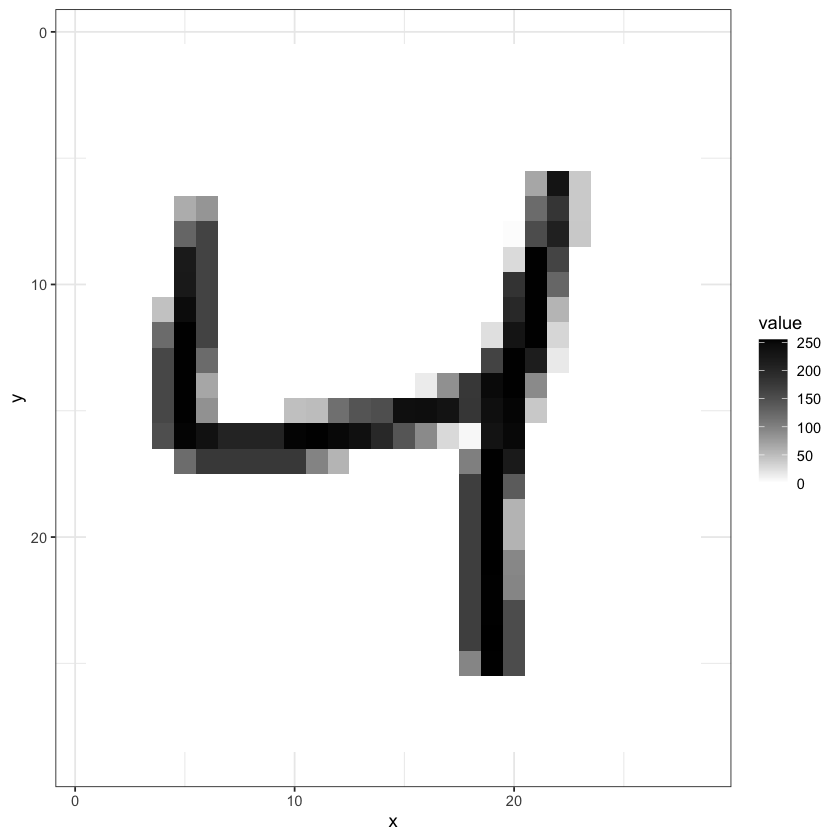

In [9]:

image_1 <- as.data.frame(x_train[3, , ]) 
colnames(image_1) <- seq_len(ncol(image_1))
image_1$y <- seq_len(nrow(image_1))
image_1 <- gather(image_1, "x", "value", -y)
image_1$x <- as.integer(image_1$x)

ggplot(image_1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black", na.value = NA) +
  scale_y_reverse() +
  theme_bw()

In [6]:
# Variable dependiente -> target
y_train <- mnist$train$y
head(y_train)

[1] 5 0 4 1 9 2

### Muestra de Prueba

In [10]:
x_test <- mnist$test$x


In [11]:
y_test <- mnist$test$y

### Limpieza de los datos

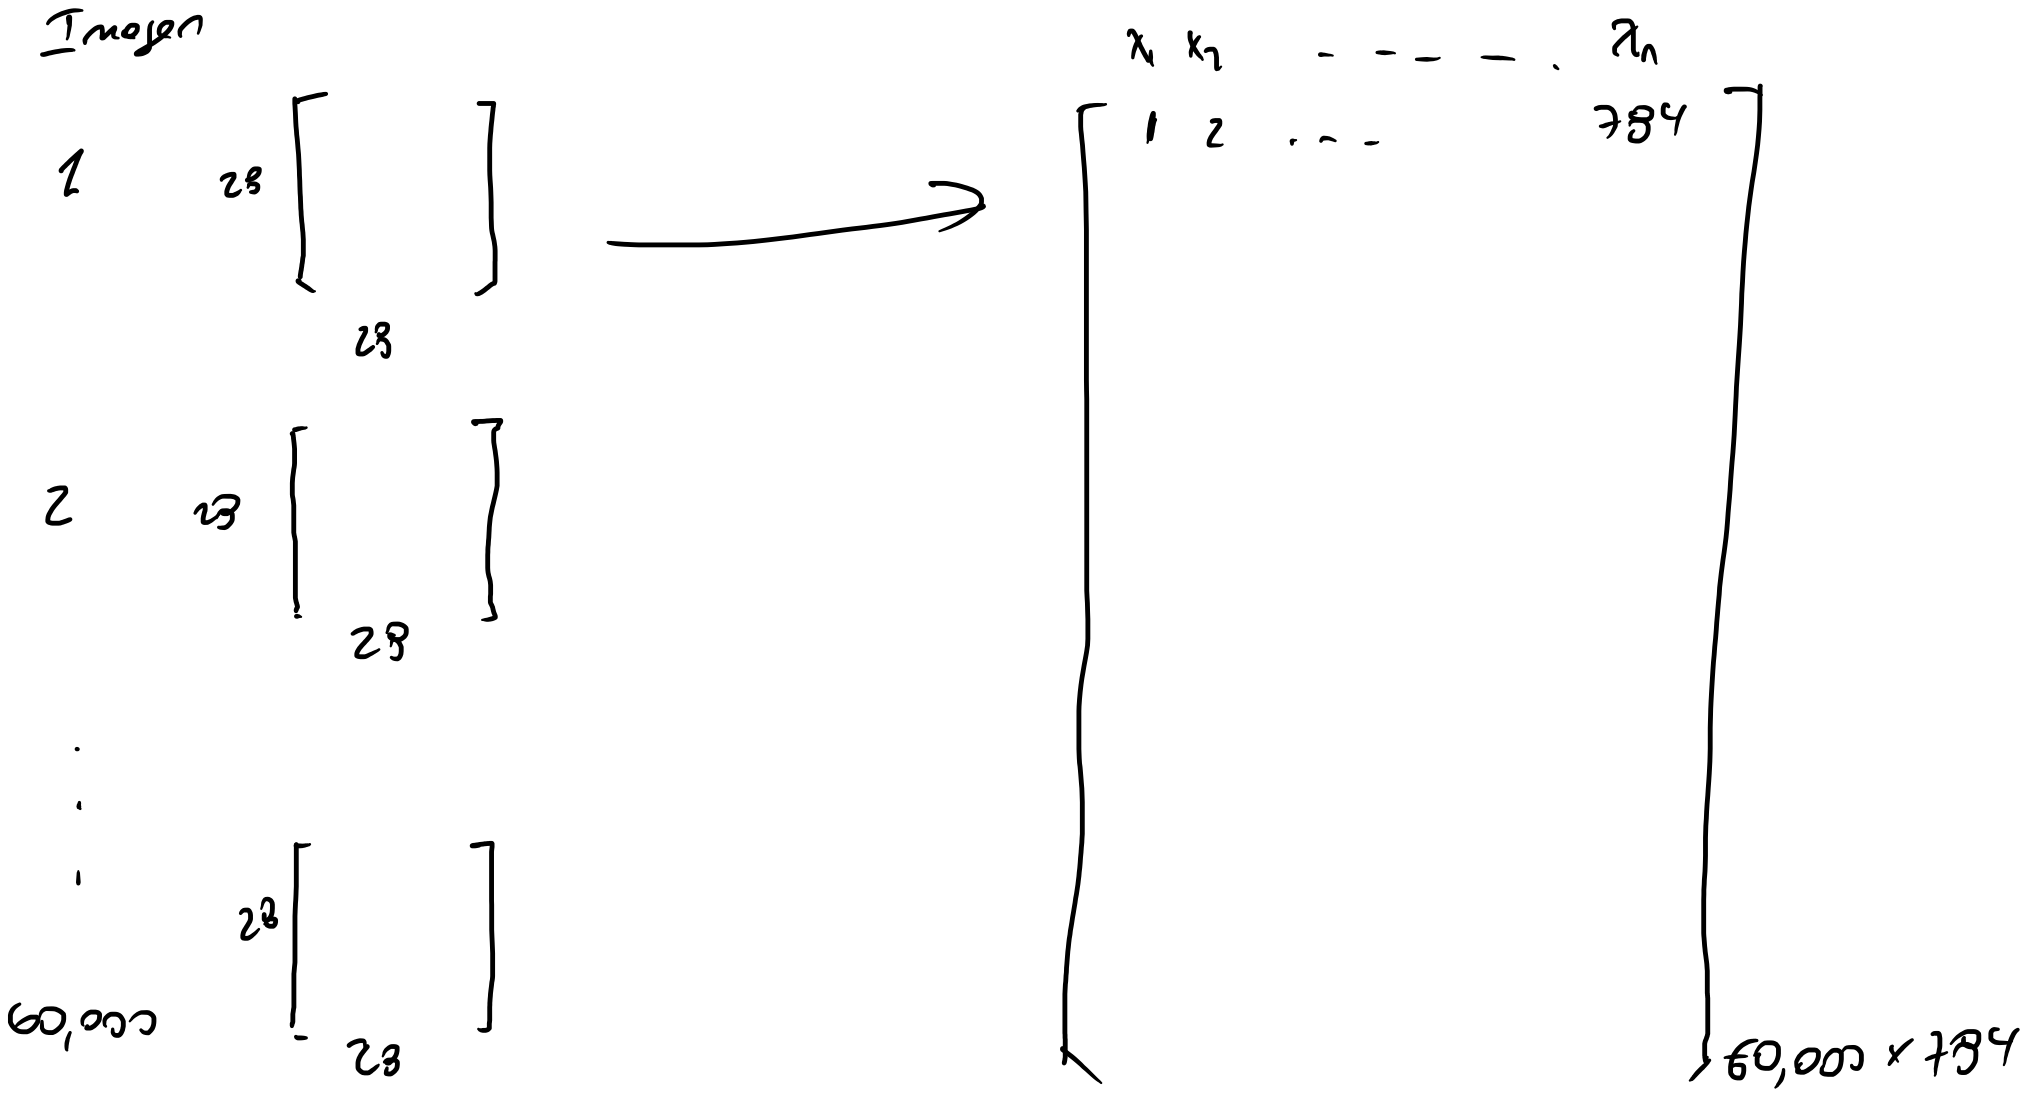

In [12]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
dim(x_train)

[1] 60000   784

In [13]:
x_train[1,]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
[163] 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
[181] 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
[199]   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
[217]  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
[235] 253 253 253 253 198 182 247 241   0   0   0   0   0   0   0   0   0   0
[253]   0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
[271]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[289]   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0   0   0   0
[307]   0   0   0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0
[325]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[343]   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0   0
[361]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  35 241
[379] 225 160 108   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[397]   0   0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0
[415]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[433]   0   0  45 186 253 253 150  27   0   0   0   0   0   0   0   0   0   0
[451]   0   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187
[469]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[487]   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0
[505]   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253
[523] 253 207   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[541]   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0
[559]   0   0   0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253
[577] 253 201  78   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[595]   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0
[613]   0   0   0   0   0   0   0   0   0   0  18 171 219 253 253 253 253 195
[631]  80   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[649]  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0
[667]   0   0   0   0   0   0   0   0   0   0 136 253 253 253 212 135 132  16
[685]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[703]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[721]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[739]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[757]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[775]   0   0   0   0   0   0   0   0   0   0

In [14]:
x_test <- array_reshape(x_test, c(nrow(x_test), 784))

In [15]:
# rescale pixeles entre 0 y 1
x_train <- x_train / 255
x_test <- x_test / 255

In [16]:
x_train[1,]

[1] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
  [7] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [13] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [19] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [25] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [31] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [37] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [43] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [49] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [55] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [61] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [67] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [73] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [79] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [85] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [91] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
 [97] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[103] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[109] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[115] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[121] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[127] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[133] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[139] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[145] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[151] 0.000000000 0.000000000 0.011764706 0.070588235 0.070588235 0.070588235
[157] 0.494117647 0.533333333 0.686274510 0.101960784 0.650980392 1.000000000
[163] 0.968627451 0.498039216 0.000000000 0.000000000 0.000000000 0.000000000
[169] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[175] 0.000000000 0.000000000 0.117647059 0.141176471 0.368627451 0.603921569
[181] 0.666666667 0.992156863 0.992156863 0.992156863 0.992156863 0.992156863
[187] 0.882352941 0.674509804 0.992156863 0.949019608 0.764705882 0.250980392
[193] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[199] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.192156863
[205] 0.933333333 0.992156863 0.992156863 0.992156863 0.992156863 0.992156863
[211] 0.992156863 0.992156863 0.992156863 0.984313725 0.364705882 0.321568627
[217] 0.321568627 0.219607843 0.152941176 0.000000000 0.000000000 0.000000000
[223] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[229] 0.000000000 0.000000000 0.000000000 0.070588235 0.858823529 0.992156863
[235] 0.992156863 0.992156863 0.992156863 0.992156863 0.776470588 0.713725490
[241] 0.968627451 0.945098039 0.000000000 0.000000000 0.000000000 0.000000000
[247] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[253] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[259] 0.000000000 0.000000000 0.313725490 0.611764706 0.419607843 0.992156863
[265] 0.992156863 0.803921569 0.043137255 0.000000000 0.168627451 0.603921569
[271] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[277] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[283] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[289] 0.000000000 0.054901961 0.003921569 0.603921569 0.992156863 0.352941176
[295] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[301] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[307] 0.000000000 0.0000

#### Target como categóricos
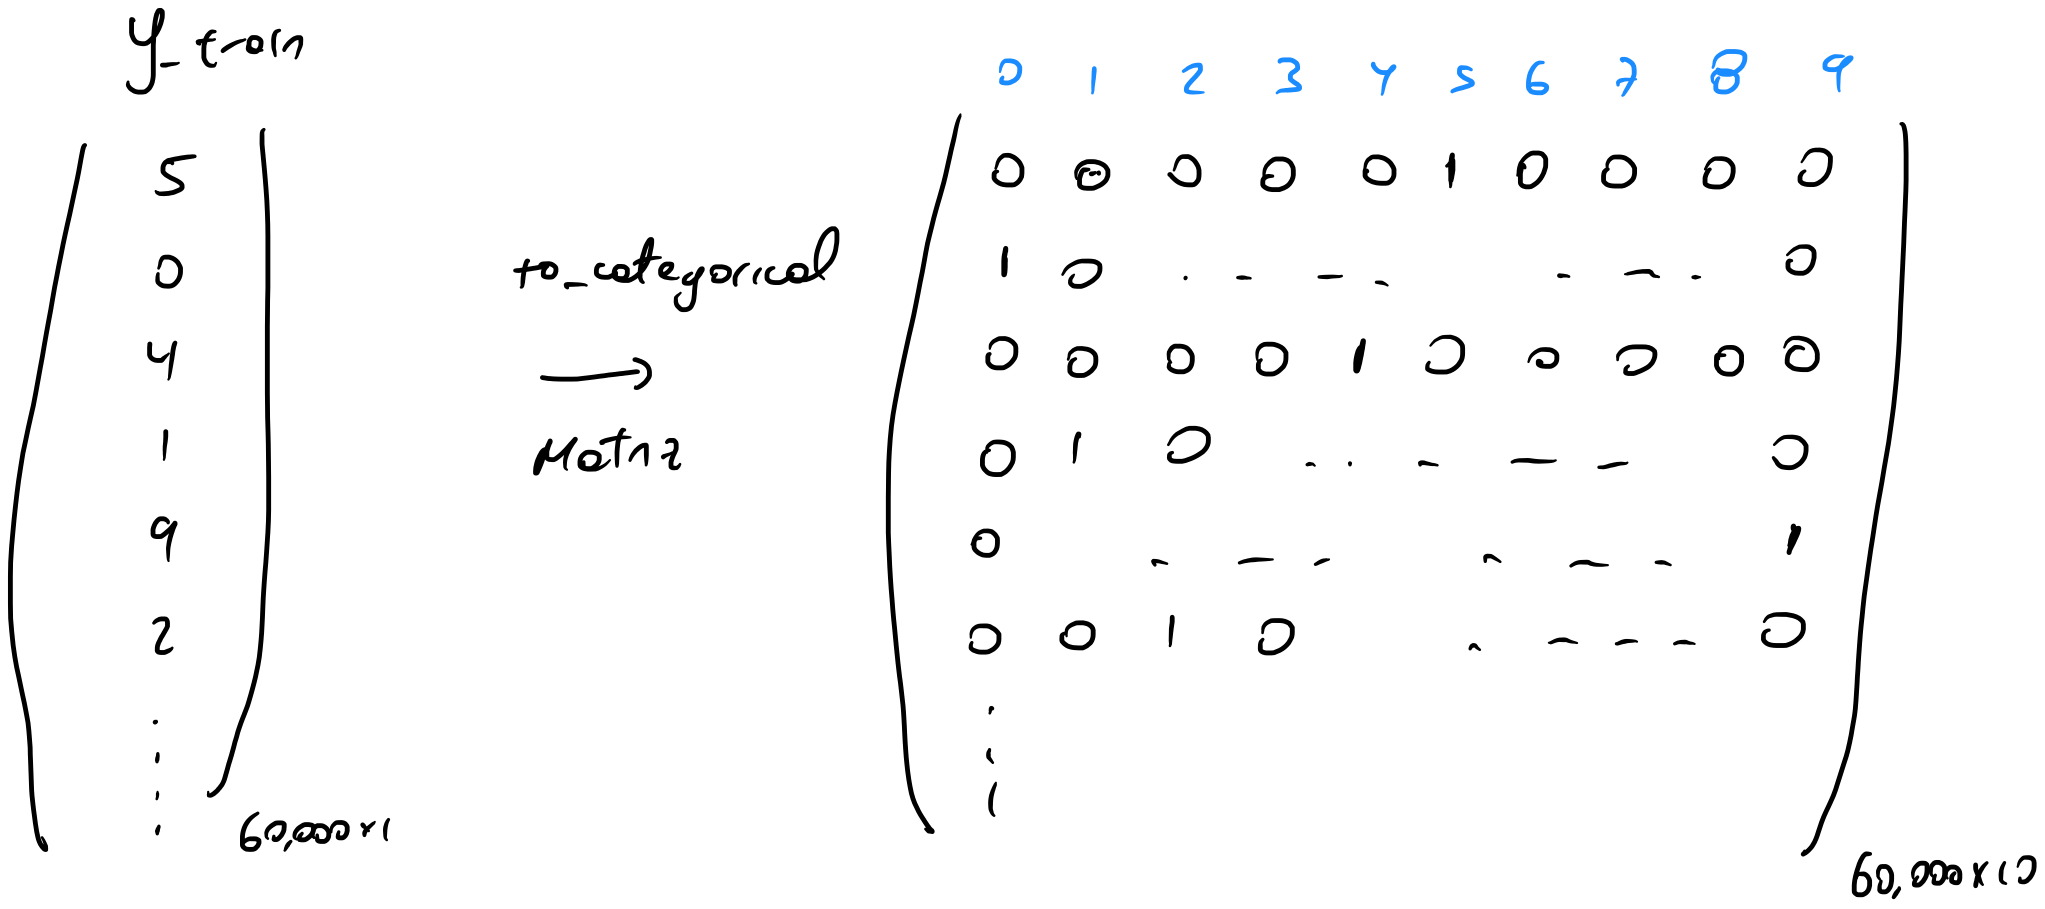

In [17]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)
head(y_train)

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


## Armando la primer red

### Configurar las capas 

La arquitectura de una red neuronal se construye a partir de capas. Las capas son bloques fundamentales que procesan la entrada y producen la salida. Cada capa se configura con un conjunto de parámetros que definen cómo se transforma la entrada en la salida y los flujos a través de ellas.

Una red neuronal típicamente se compone de tres tipos de capas: capas de entrada, capas ocultas y capas de salida. Cada capa se compone de un conjunto de neuronas que procesan la información de entrada y producen una salida.

* **Capas de entrada**: son la primera capa de la red y se encargan de recibir los datos de entrada y procesarlos para pasarlos a la siguiente capa. 
* **Capas ocultas**: son capas intermedias entre la capa de entrada y la capa de salida. Aqui es donde se genera la "magia" a traves de funciones de activación no lineales
* **Capas de salida**: son la última capa de la red y se encargan de producir la salida final. En una red neuronal de clasificación, como la que estamos construyendo, la capa de salida tendría un conjunto de neuronas que representan las diferentes clases posibles y producirían una salida para indicar a qué clase pertenece el dato de entrada.



### Funciones de Activación para las capas ocultas

#### Función ReLU (rectified linear unit)

 $$\operatorname{ReLU}(x) = \max \{x, 0\}.$$


<div >
    <img style="height:300px" src = "figures_notebook/relu.png" />
</div>




#### Función Sigmoide

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$


<div >
    <img style="height:300px" src = "figures_notebook/sigmoid.png" />
</div>



#### Función $Tanh$ 

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

<div >
    <img style="height:300px"  src = "figures_notebook/tanh.png" />
</div>


####  Otras funciones de activación

   - $h=cos(W x+b)$ Goodfellow et al. (2016) claim that on the MNIST
        dataset they obtained an error rate of less than 1 percent

   - Radial basis function (RBF):
        $exp\left( \frac{1}{\sigma^2}||W-x||^2 \right)$

   - Softplus: $log(1+e^x)$

   - Hard tanh: $max(-1,min(1,x))$

-   Hidden unit design remains an active area of research, and many
    useful hidden unit types remain to be discovered



In [18]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 10, activation = 'relu', input_shape = c(784)) #activación


In [19]:
model

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 10)                      7850        
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
________________________________________________________________________________

**Dense**: En una capa `layer_dense`, cada neurona está conectada a todas las neuronas de la capa anterior. Los `units`que se especifican en los parámetros, se refieren a la cantidad de neuronas que se deben incluir en una capa determinada de la red neuronal. Es decir, los units son el número de nodos de la capa. Por último, el parámetro `activation`  especifica la función de activación que se va a usar en esa capa de la red.



### Funciones de Activación para la capa de salida

- La elección de la función de activación desta estrechamente relacionada con el problema a resorver

  - Problemas de Regresión $\rightarrow$  combinación lineal $y=\beta_0 + \sum_{k=1}^K \beta_k h_k$ 

  - Clasificación Binaria $\rightarrow$  sigmoidea (logística) 

  - Clasificación Multiclase  $\rightarrow$  Softmax 

### Aside: The softmax function

Multinomial logistic regrssion

\begin{align}
Pr(y=j | X) = \frac{e^{h_i}}{\sum_{j=1}^K e^{h_j}}
\end{align}




In [20]:
h<-c(1.3,7.3,2.2,0.7,1.1,2.5,3.1,4.5,1.3,1.8)

exp(h)/sum(exp(h))

[1] 0.002248166 0.906975013 0.005529597 0.001233820 0.001840643 0.007464175
 [7] 0.013600613 0.055153207 0.002248166 0.003706600

In [21]:
model %>% 
    layer_dense(units = 10, activation = 'softmax') #output

In [22]:
model

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 10)                      7850        
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      110         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
________________________________________________________________________________

## Entrenando la primera red

### Compilar el modelo

Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Éstos se añaden durante el paso de compilación del modelo:





<div >
    <img style="height:300px"  src = "figures_notebook/fig1_NN.png" />
</div>


* **Función de pérdida**: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta.
    La  elección esta intimamente ligada al problema que queremos resolver. En este caso utilizaremos la función `sparse_categorical_crossentropy` que compara la distribución de probabilidad predicha por el modelo con la distribución de probabilidad real de las etiquetas de clase. Calcula la diferencia entre estas dos distribuciones y devuelve un valor de pérdida. 


<div >
    <img style="height:300px"  src = "figures_notebook/fig2_NN.png" />
</div>

In [25]:
log(0.1)

[1] -2.302585

<div >
    <img style="height:300px"  src = "figures_notebook/fig3_NN.png" />
</div>

* **Optimizador**: Así es como se actualizan los pesos del modelo. `Adam`  un algoritmo de optimización de gradiente descendente estocástico popular utilizado en el aprendizaje automático y la optimización de redes neuronales. Para saber más de este pueden ir [acá](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).
`Adam`  un algoritmo de optimización de gradiente descendente estocástico popular utilizado en el aprendizaje automático y la optimización de redes neuronales. Para saber más de este pueden ir [acá](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).



In [26]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam'

)

El modelo se resuelve iterativamente, y necesitamos especificar estos hiperparámetros


#### Epoch 

Un `epoch` se refiere a una iteración completa a través de todos los datos de entrenamiento durante el proceso de entrenamiento de un modelo. Es decir, un `epoch` es cuando un conjunto de datos COMPLETO  pasa UNA VEZ hacia adelante y hacia atrás a través de la red neuronal. El número de epochs se define como un hiperparámetro de entrenamiento y determina cuántas veces el algoritmo de aprendizaje automático debe pasar por todo el conjunto de datos de entrenamiento. 

####  Batch_size

En Keras y en general en el aprendizaje automático, el término "batch size" o "tamaño del lote" se refiere al número de muestras de entrenamiento que se pasarán a través de la red antes de que se actualicen los parámetros del modelo (por ejemplo, los pesos). Es un hiperparámetro que define la cantidad de datos que se ven durante una iteración del proceso de entrenamiento.


In [27]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 30, 
  batch_size = 128,
  validation_split = 0.2
)

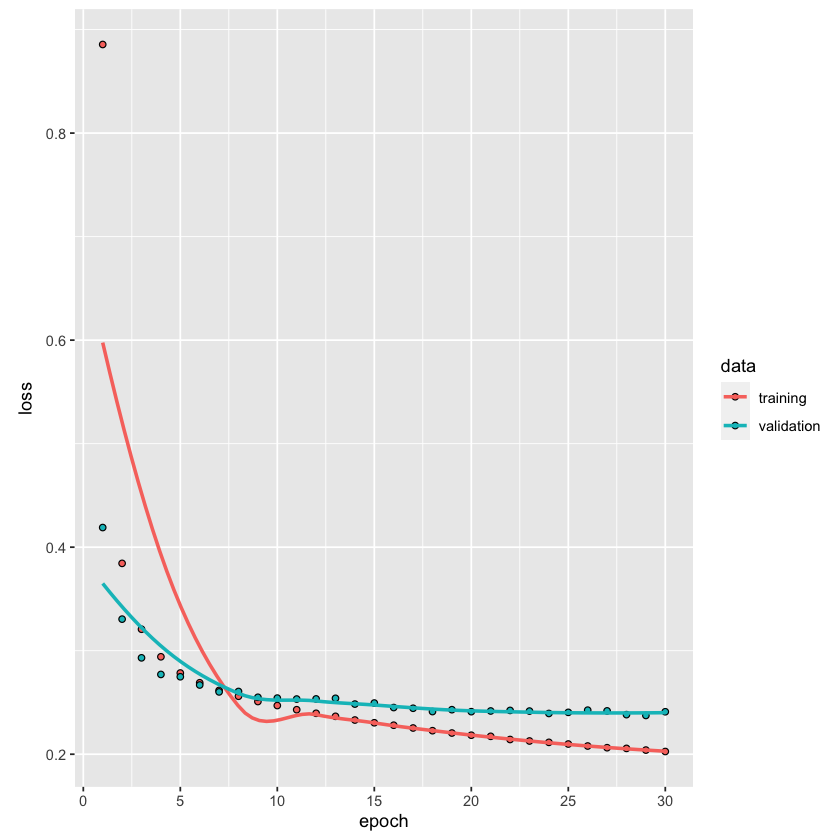

In [28]:
plot(history)

## Evaluando la primera red

In [29]:
model %>% evaluate(x_test, y_test)

loss 
0.2347131

In [32]:
y_test[1,]

[1] 0 0 0 0 0 0 0 1 0 0

In [31]:
phat <- model  %>% predict(x_test)
head(round(phat,3))

0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.995,0.000,0.000
0.001,0.001,0.979,0.001,0.000,0.018,0.001,0.000,0.000,0.000
0.000,0.983,0.006,0.002,0.000,0.001,0.002,0.004,0.002,0.000
1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.000,0.000,0.000,0.000,0.988,0.000,0.000,0.001,0.001,0.009
0.000,0.994,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000


In [33]:
y_hat <- model  %>% predict(x_test) %>% k_argmax() #categoría con probabilidad mas alta
y_hat

tf.Tensor([7 2 1 ... 4 5 6], shape=(10000), dtype=int64)

In [34]:
confusionMatrix(data = factor(as.numeric(y_hat), levels = 0:9), 
  reference = factor(mnist$test$y, levels = 0:9))

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  963    0   13    3    1    7    8    3   10   11
         1    0 1112    5    2    1    3    3    6    3    6
         2    0    3  930   12    3    1    3   21    9    0
         3    1    3   18  932    0   29    2    5   26   13
         4    2    0    9    2  938    7    8    8   13   33
         5    5    2    7   24    0  806   14    2   23    7
         6    8    2   15    1    8   16  920    0   13    0
         7    1    3    9   10    3    6    0  958   10   16
         8    0   10   23   14    3   13    0    2  851    4
         9    0    0    3   10   25    4    0   23   16  919

Overall Statistics
                                          
               Accuracy : 0.9329          
                 95% CI : (0.9278, 0.9377)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         

## Arquitectura de redes y capas múltiples

- Otra consideración clave en el diseño de redes neuronales es determinar
     la arquitectura.

- La palabra arquitectura se refiere a la estructura general del
     red: cuantas unidades debe tener y como deben estar estas unidades
     conectados entre sí.

- El teorema de aproximación universal (Hornik et al., 1989;
    Cybenko, 1989) garantiza que independientemente de
     qué función estamos tratando de aprender, un MLP suficientemente grande
     poder representar esta función.
     
- Sin embargo, no tenemos garantía de que el algoritmo de entrenamiento sea
     capaz de aprender esa función.

- Incluso si la red es capaz de representar la función, el aprendizaje puede
     fracasar por dos motivos diferentes.

     1. Es posible que el algoritmo de optimización utilizado para el entrenamiento no pueda
         encontrar el valor de los parámetros que corresponde al deseado
         función.

     2. El algoritmo de entrenamiento podría elegir la función incorrecta como
         resultado del sobreajuste     
         
- Las redes neuronales modernas suelen tener más de una capa oculta.
     y a menudo muchas unidades por capa.

- En teoría, una única capa oculta con un gran número de unidades tiene la
     capacidad de aproximar la mayoría de funciones.

- Sin embargo, la tarea es mucho más fácil con varias capas, cada una de ellas de tamaño modesto.

In [35]:
model2 <- keras_model_sequential() 

model2 %>%
layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
layer_dense(units = 128, activation = 'relu') %>%
layer_dense(units = 10, activation = 'softmax')

In [36]:
summary(model2)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dense_3 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________________________________________


In [37]:
model2 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy'
)

In [38]:
history2 <- model2 %>% fit(
  x_train, y_train, 
  epochs = 8, 
  batch_size = 128,
  validation_split = 0.2
)

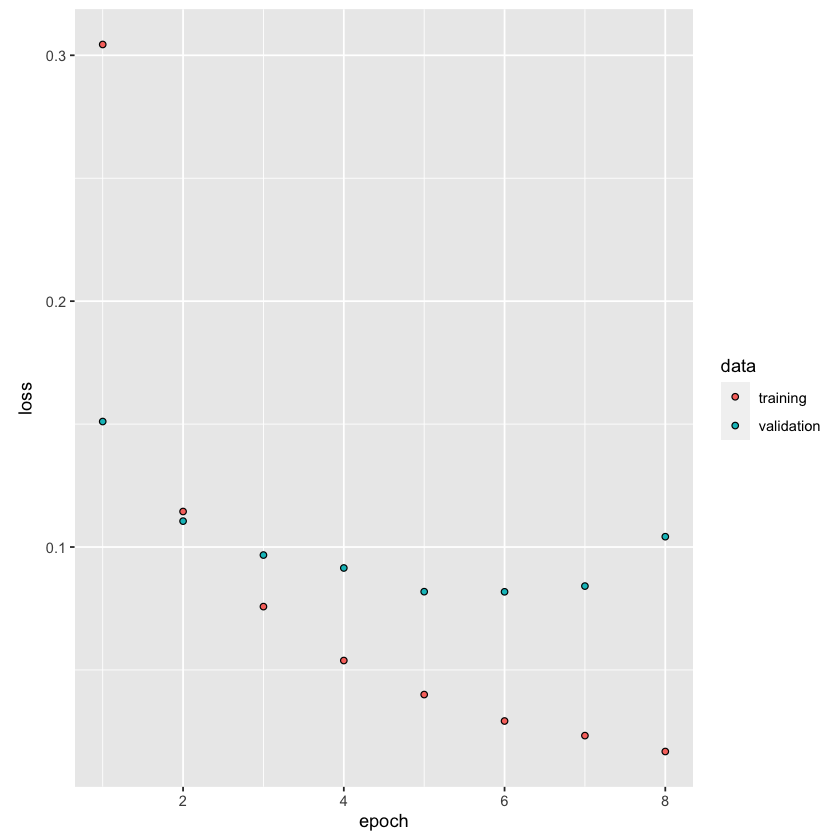

In [39]:
plot(history2)

In [40]:
model2 %>% evaluate(x_test, y_test)

loss 
0.08281195

In [41]:
y_hat2 <- model2  %>% predict(x_test) %>% k_argmax() #categoría con probabilidad mas alta
confusionMatrix(data = factor(as.numeric(y_hat2), levels = 0:9), 
  reference = factor(mnist$test$y, levels = 0:9))

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  970    0    3    0    1    3    4    1    1    4
         1    0 1119    0    0    0    0    1    1    0    1
         2    2    2 1010    1    3    0    0    7    3    0
         3    1    3    5  993    1   10    1    2    8    2
         4    2    0    1    0  938    0    3    0    1    3
         5    1    0    0    3    0  865    4    0    1    2
         6    1    4    1    0    2    4  942    0    0    0
         7    0    2    7    3    1    0    0  996    2    0
         8    2    3    5    0    1    2    2    2  944    0
         9    1    2    0   10   35    8    1   19   14  997

Overall Statistics
                                          
               Accuracy : 0.9774          
                 95% CI : (0.9743, 0.9802)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         

## Dropout Learning

Esta es una forma de regularización relativamente nueva y eficiente. Inspirado en los random forest, la idea es eliminar aleatoriamente una fracción $\phi$ de las unidades en una capa al ajustar el modelo. 

Las unidades sobrevivientes sustituyen a las que faltan y sus pesos aumentan en un factor de 1/(1 − $\phi$) para compensar. Esto evita que los nodos se especialicen demasiado, llevando a sobreajuste.

Puede ser visto como una forma de regularización. 

En la práctica, el "dropout" se logra configurando aleatoriamente los nodos  "abandonados" a cero, mientras se mantiene intacta la arquitectura.

In [42]:
model3 <- keras_model_sequential() 

model3 %>%
layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>% 
layer_dropout(rate = 0.4) %>%
layer_dense(units = 128, activation = 'relu') %>%
layer_dropout(rate = 0.3) %>%
layer_dense(units = 10, activation = 'softmax')

In [43]:
model3 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy'
)

In [46]:
model3

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_7 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_6 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout (Dropout)                   (None, 128)                     0           
________________________________________________________________________________
dense_5 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_______________

In [47]:
history3 <- model3 %>% fit(
  x_train, y_train, 
  epochs = 30, 
  batch_size = 128,
  validation_split = 0.2
)

In [48]:
model3 %>% evaluate(x_test, y_test)

loss 
0.07840773

In [49]:
y_hat3 <- model3  %>% predict(x_test) %>% k_argmax() #categoría con probabilidad mas alta
confusionMatrix(data = factor(as.numeric(y_hat3), levels = 0:9), 
  reference = factor(mnist$test$y, levels = 0:9))

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9
         0  974    0    5    0    0    2    5    3    5    4
         1    1 1126    1    0    0    0    2    4    0    3
         2    1    2 1009    6    3    0    0   11    2    1
         3    1    1    1  986    0    7    1    2    4    3
         4    0    0    2    0  967    1    3    0    6    9
         5    0    1    0    4    0  870    3    0    6    2
         6    1    2    1    0    5    3  944    0    1    0
         7    1    0    5    5    1    2    0 1004    4    3
         8    1    2    8    3    0    4    0    1  943    0
         9    0    1    0    6    6    3    0    3    3  984

Overall Statistics
                                          
               Accuracy : 0.9807          
                 95% CI : (0.9778, 0.9833)
    No Information Rate : 0.1135          
    P-Value [Acc > NIR] : < 2.2e-16       
                                         